In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

property_type                     society      sector  price  \
0          flat           dlf regal gardens   sector 90   1.30   
1          flat               tata primanti   sector 72   3.25   
2          flat  ramprastha the edge towers  sector 37d   0.80   
3          flat      m3m golf hills phase 1   sector 79   1.70   
4          flat                 ss the leaf   sector 85   1.12   

   price_per_sqft  bedRoom  bathroom balcony  floorNum   agePossession  \
0          7151.0        3         3      3+       7.0  Relatively New   
1         10545.0        3         3       3       2.0  Moderately Old   
2          5797.0        2         2       3       2.0  Relatively New   
3         10828.0        3         2       3      10.0  Relatively New   
4          6452.0        2         2       3      10.0  Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0         1700.0           0             0           0           0       0   
1         2986.0           0             1           0           0       0   
2         1300.0           0             0           0           0       0   
3         1570.0           0             0           0           0       0   
4         1485.0           0             0           0           0       1   

   furnishing_type  luxury_score  
0                0           141  
1                0            94  
2                0            78  
3                0             0  
4                0            49

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 90   1.30        3         3      3+       7.0   
1          flat   sector 72   3.25        3         3       3       2.0   
2          flat  sector 37d   0.80        2         2       3       2.0   
3          flat   sector 79   1.70        3         2       3      10.0   
4          flat   sector 85   1.12        2         2       3      10.0   

    agePossession  built_up_area  study room  servant room  store room  \
0  Relatively New         1700.0           0             0           0   
1  Moderately Old         2986.0           0             1           0   
2  Relatively New         1300.0           0             0           0   
3  Relatively New         1570.0           0             0           0   
4  Relatively New         1485.0           0             0           0   

   pooja room  others  furnishing_type  luxury_score  
0           0       0                0           141  
1           0       0                0            94  
2           0       0                0            78  
3           0       0                0             0  
4           0       1                0            49

### luxury score

<Axes: ylabel='luxury_score'>

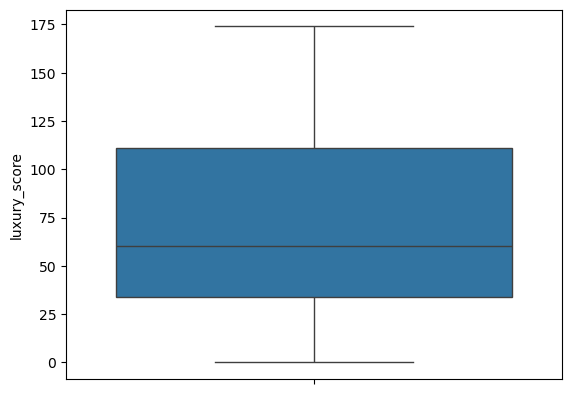

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 90   1.30        3         3      3+       7.0   
1          flat   sector 72   3.25        3         3       3       2.0   
2          flat  sector 37d   0.80        2         2       3       2.0   
3          flat   sector 79   1.70        3         2       3      10.0   
4          flat   sector 85   1.12        2         2       3      10.0   

    agePossession  built_up_area  study room  servant room  store room  \
0  Relatively New         1700.0           0             0           0   
1  Moderately Old         2986.0           0             1           0   
2  Relatively New         1300.0           0             0           0   
3  Relatively New         1570.0           0             0           0   
4  Relatively New         1485.0           0             0           0   

   pooja room  others  furnishing_type  luxury_score luxury_category  
0           0       0                0           141          Medium  
1           0       0                0            94          Medium  
2           0       0                0            78          Medium  
3           0       0                0             0             Low  
4           0       1                0            49             Low

### floorNum

<Axes: ylabel='floorNum'>

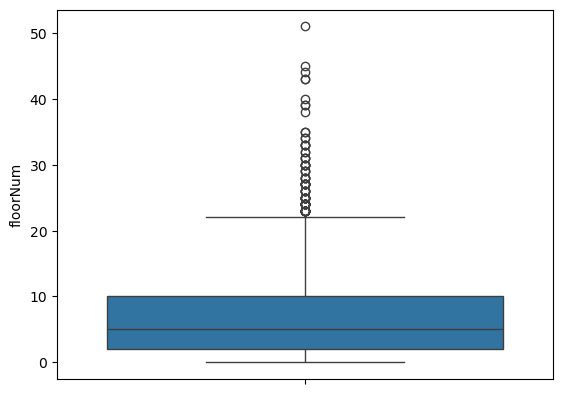

In [14]:
sns.boxplot(df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat   sector 90   1.30        3         3      3+       7.0   
1          flat   sector 72   3.25        3         3       3       2.0   
2          flat  sector 37d   0.80        2         2       3       2.0   
3          flat   sector 79   1.70        3         2       3      10.0   
4          flat   sector 85   1.12        2         2       3      10.0   

    agePossession  built_up_area  study room  servant room  store room  \
0  Relatively New         1700.0           0             0           0   
1  Moderately Old         2986.0           0             1           0   
2  Relatively New         1300.0           0             0           0   
3  Relatively New         1570.0           0             0           0   
4  Relatively New         1485.0           0             0           0   

   pooja room  others  furnishing_type  luxury_score luxury_category  \
0           0       0                0           141          Medium   
1           0       0                0            94          Medium   
2           0       0                0            78          Medium   
3           0       0                0             0             Low   
4           0       1                0            49             Low   

  floor_category  
0      Mid Floor  
1      Low Floor  
2      Low Floor  
3      Mid Floor  
4      Mid Floor

In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [19]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony   agePossession  \
0          flat   sector 90   1.30        3         3      3+  Relatively New   
1          flat   sector 72   3.25        3         3       3  Moderately Old   
2          flat  sector 37d   0.80        2         2       3  Relatively New   
3          flat   sector 79   1.70        3         2       3  Relatively New   
4          flat   sector 85   1.12        2         2       3  Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0         1700.0           0             0           0           0       0   
1         2986.0           0             1           0           0       0   
2         1300.0           0             0           0           0       0   
3         1570.0           0             0           0           0       0   
4         1485.0           0             0           0           0       1   

   furnishing_type luxury_category floor_category  
0                0          Medium      Mid Floor  
1                0          Medium      Low Floor  
2                0          Medium      Low Floor  
3                0             Low      Mid Floor  
4                0             Low      Mid Floor

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 's

In [21]:
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0   104.0        3         3      4.0            3.0   
1               0.0    84.0        3         3      3.0            0.0   
2               0.0    45.0        2         2      3.0            3.0   
3               0.0    90.0        3         2      3.0            3.0   
4               0.0    98.0        2         2      3.0            3.0   
...             ...     ...      ...       ...      ...            ...   
3549            0.0    61.0        3         4      4.0            3.0   
3550            0.0    93.0        3         4      4.0            3.0   
3551            0.0   108.0        2         2      2.0            3.0   
3552            1.0    58.0        4         4      3.0            2.0   
3553            0.0    12.0        4         4      4.0            3.0   

      built_up_area  study room  servant room  store room  pooja room  others  \
0            1700.0           0             0           0           0       0   
1            2986.0           0             1           0           0       0   
2            1300.0           0             0           0           0       0   
3            1570.0           0             0           0           0       0   
4            1485.0           0             0           0           0       1   
...             ...         ...           ...         ...         ...     ...   
3549         2500.0           0             1           0           1       1   
3550         2090.0           0             1           0           0       0   
3551          744.0           0             0           0           0       0   
3552         3200.0           0             0           0           0       0   
3553         3150.0           0             1           1           0       0   

      furnishing_type  luxury_category  floor_category  
0                   0              2.0             2.0  
1                   0              2.0             1.0  
2                   0              2.0             1.0  
3                   0              1.0             2.0  
4                   0              1.0             2.0  
...               ...              ...             ...  
3549                1              0.0             2.0  
3550                2              0.0             0.0  
3551                0              1.0             2.0  
3552                1              2.0             1.0  
3553                1              0.0             2.0  

[3554 rows x 15 columns]

In [22]:
y_label

0       1.30
1       3.25
2       0.80
3       1.70
4       1.12
        ... 
3549    4.80
3550    2.25
3551    0.48
3552    7.42
3553    2.95
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

In [24]:
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()

<Axes: >

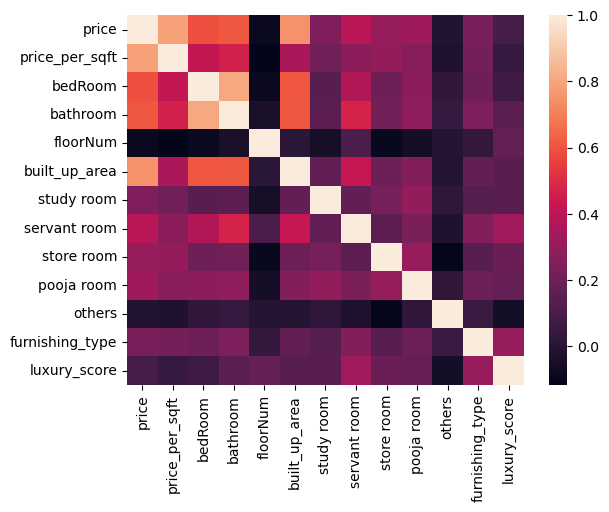

In [25]:
 sns.heatmap(correlation)

In [26]:
fi_df1 = correlation['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

feature  corr_coeff
0    price_per_sqft    0.787437
1           bedRoom    0.591289
2          bathroom    0.609777
3          floorNum   -0.087442
4     built_up_area    0.748574
5        study room    0.242955
6      servant room    0.391930
7        store room    0.305677
8        pooja room    0.319852
9            others   -0.013064
10  furnishing_type    0.223511
11     luxury_score    0.091473

### Technique 2 - Random Forest Feature Importance

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

feature  rf_importance
6     built_up_area       0.646303
1            sector       0.105670
0     property_type       0.103648
3          bathroom       0.025401
2           bedRoom       0.024175
8      servant room       0.020472
5     agePossession       0.014917
4           balcony       0.012656
12  furnishing_type       0.010318
9        store room       0.008294
7        study room       0.007865
14   floor_category       0.006515
13  luxury_category       0.006459
10       pooja room       0.004549
11           others       0.002758

### Technique 3 - Gradient Boosting Feature importances

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

feature  gb_importance
6     built_up_area       0.683869
1            sector       0.099655
0     property_type       0.096630
2           bedRoom       0.038432
3          bathroom       0.035839
8      servant room       0.021827
9        store room       0.009552
5     agePossession       0.005141
7        study room       0.003919
12  furnishing_type       0.002214
4           balcony       0.001771
14   floor_category       0.000533
11           others       0.000401
13  luxury_category       0.000126
10       pooja room       0.000090

### Technique 4 - Permutation Importance

In [32]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

feature  permutation_importance
6     built_up_area                0.746968
0     property_type                0.169055
1            sector                0.142937
3          bathroom                0.021947
2           bedRoom                0.020919
8      servant room                0.019555
7        study room                0.007112
4           balcony                0.005165
5     agePossession                0.005122
12  furnishing_type                0.004458
14   floor_category                0.001981
10       pooja room                0.001616
9        store room                0.001511
13  luxury_category                0.001315
11           others               -0.003833

### Technique 5 - LASSO

In [34]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


feature  lasso_coeff
6     built_up_area     1.511507
0     property_type     0.717852
3          bathroom     0.275905
9        store room     0.198811
7        study room     0.171427
8      servant room     0.161950
12  furnishing_type     0.161758
10       pooja room     0.073499
13  luxury_category     0.054804
2           bedRoom     0.013868
5     agePossession    -0.000000
14   floor_category    -0.001656
11           others    -0.017542
4           balcony    -0.042468
1            sector    -0.054951

### Technique 6 - RFE

In [36]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


feature  rfe_score
6     built_up_area   0.645864
0     property_type   0.105381
1            sector   0.103165
2           bedRoom   0.025591
3          bathroom   0.024335
8      servant room   0.020438
5     agePossession   0.014158
4           balcony   0.013359
12  furnishing_type   0.010975
9        store room   0.007143
7        study room   0.007012
13  luxury_category   0.006847
14   floor_category   0.006357
10       pooja room   0.006221
11           others   0.003153

### Technique 7 - Linear Regression Weights

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


feature  reg_coeffs
6     built_up_area    1.514043
0     property_type    0.718105
3          bathroom    0.282463
9        store room    0.203219
7        study room    0.179410
8      servant room    0.171217
12  furnishing_type    0.171010
10       pooja room    0.076505
13  luxury_category    0.066270
2           bedRoom    0.016629
5     agePossession    0.001827
14   floor_category   -0.012348
11           others   -0.025597
1            sector   -0.064006
4           balcony   -0.065220

### Technique 8 - SHAP

In [41]:
!pip install shap

In [42]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-2.25072337e-01, -5.20340598e-01,  2.67951515e-03, ...,
        -1.70899073e-02,  1.11163788e-03, -7.65091090e-03],
       [-3.72848455e-01, -6.08827524e-02,  2.94384525e-02, ...,
        -7.89241379e-02, -4.51546669e-02, -7.04643568e-02],
       [-2.34901288e-01, -1.00542288e-01, -7.81601866e-02, ...,
        -1.29139421e-02, -4.49650550e-03, -6.37529052e-03],
       ...,
       [-1.90700323e-01, -4.18255505e-01, -4.46538746e-02, ...,
        -1.12679896e-02, -2.64697173e-04, -4.81830873e-03],
       [ 1.40851964e+00,  8.95077750e-01, -7.80047837e-02, ...,
        -1.40214761e-02,  1.40912535e-02,  1.79686968e-02],
       [-1.04362854e+00, -6.59287481e-01, -1.03765993e-02, ...,
         2.49634912e-02,  1.92692595e-02, -1.40947525e-02]])

In [43]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

feature  SHAP_score
6     built_up_area    1.244983
0     property_type    0.475504
1            sector    0.381442
3          bathroom    0.113874
8      servant room    0.093573
2           bedRoom    0.050615
4           balcony    0.039255
12  furnishing_type    0.026855
5     agePossession    0.026182
14   floor_category    0.023841
7        study room    0.020733
9        store room    0.019538
13  luxury_category    0.014884
10       pooja room    0.010517
11           others    0.006591

In [44]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [45]:
final_fi_df


corr_coeff  rf_importance  gb_importance  \
feature                                                     
bedRoom            0.591289       0.024175       0.038432   
bathroom           0.609777       0.025401       0.035839   
built_up_area      0.748574       0.646303       0.683869   
study room         0.242955       0.007865       0.003919   
servant room       0.391930       0.020472       0.021827   
store room         0.305677       0.008294       0.009552   
pooja room         0.319852       0.004549       0.000090   
others            -0.013064       0.002758       0.000401   
furnishing_type    0.223511       0.010318       0.002214   

                 permutation_importance  lasso_coeff  rfe_score  reg_coeffs  \
feature                                                                       
bedRoom                        0.020919     0.013868   0.025591    0.016629   
bathroom                       0.021947     0.275905   0.024335    0.282463   
built_up_area                  0.746968     1.511507   0.645864    1.514043   
study room                     0.007112     0.171427   0.007012    0.179410   
servant room                   0.019555     0.161950   0.020438    0.171217   
store room                     0.001511     0.198811   0.007143    0.203219   
pooja room                     0.001616     0.073499   0.006221    0.076505   
others                        -0.003833    -0.017542   0.003153   -0.025597   
furnishing_type                0.004458     0.161758   0.010975    0.171010   

                 SHAP_score  
feature                      
bedRoom            0.050615  
bathroom           0.113874  
built_up_area      1.244983  
study room         0.020733  
servant room       0.093573  
store room         0.019538  
pooja room         0.010517  
others             0.006591  
furnishing_type    0.026855

In [46]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [47]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.855176
bathroom           0.041958
bedRoom            0.034396
servant room       0.032945
furnishing_type    0.010702
store room         0.009344
study room         0.009296
pooja room         0.004612
others             0.001572
dtype: float64

In [48]:
# to drop pooja room, study room, others
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0   104.0        3         3      4.0            3.0   
1               0.0    84.0        3         3      3.0            0.0   
2               0.0    45.0        2         2      3.0            3.0   
3               0.0    90.0        3         2      3.0            3.0   
4               0.0    98.0        2         2      3.0            3.0   
...             ...     ...      ...       ...      ...            ...   
3549            0.0    61.0        3         4      4.0            3.0   
3550            0.0    93.0        3         4      4.0            3.0   
3551            0.0   108.0        2         2      2.0            3.0   
3552            1.0    58.0        4         4      3.0            2.0   
3553            0.0    12.0        4         4      4.0            3.0   

      built_up_area  study room  servant room  store room  pooja room  others  \
0            1700.0           0             0           0           0       0   
1            2986.0           0             1           0           0       0   
2            1300.0           0             0           0           0       0   
3            1570.0           0             0           0           0       0   
4            1485.0           0             0           0           0       1   
...             ...         ...           ...         ...         ...     ...   
3549         2500.0           0             1           0           1       1   
3550         2090.0           0             1           0           0       0   
3551          744.0           0             0           0           0       0   
3552         3200.0           0             0           0           0       0   
3553         3150.0           0             1           1           0       0   

      furnishing_type  luxury_category  floor_category  
0                   0              2.0             2.0  
1                   0              2.0             1.0  
2                   0              2.0             1.0  
3                   0              1.0             2.0  
4                   0              1.0             2.0  
...               ...              ...             ...  
3549                1              0.0             2.0  
3550                2              0.0             0.0  
3551                0              1.0             2.0  
3552                1              2.0             1.0  
3553                1              0.0             2.0  

[3554 rows x 15 columns]

In [49]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [50]:
scores.mean()

0.8033309064878112

In [51]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [52]:
scores.mean()

0.8040656529328805

In [53]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [54]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [55]:
export_df

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0   104.0        3         3      4.0            3.0   
1               0.0    84.0        3         3      3.0            0.0   
2               0.0    45.0        2         2      3.0            3.0   
3               0.0    90.0        3         2      3.0            3.0   
4               0.0    98.0        2         2      3.0            3.0   
...             ...     ...      ...       ...      ...            ...   
3549            0.0    61.0        3         4      4.0            3.0   
3550            0.0    93.0        3         4      4.0            3.0   
3551            0.0   108.0        2         2      2.0            3.0   
3552            1.0    58.0        4         4      3.0            2.0   
3553            0.0    12.0        4         4      4.0            3.0   

      built_up_area  servant room  store room  furnishing_type  \
0            1700.0             0           0                0   
1            2986.0             1           0                0   
2            1300.0             0           0                0   
3            1570.0             0           0                0   
4            1485.0             0           0                0   
...             ...           ...         ...              ...   
3549         2500.0             1           0                1   
3550         2090.0             1           0                2   
3551          744.0             0           0                0   
3552         3200.0             0           0                1   
3553         3150.0             1           1                1   

      luxury_category  floor_category  price  
0                 2.0             2.0   1.30  
1                 2.0             1.0   3.25  
2                 2.0             1.0   0.80  
3                 1.0             2.0   1.70  
4                 1.0             2.0   1.12  
...               ...             ...    ...  
3549              0.0             2.0   4.80  
3550              0.0             0.0   2.25  
3551              1.0             2.0   0.48  
3552              2.0             1.0   7.42  
3553              0.0             2.0   2.95  

[3554 rows x 13 columns]

In [104]:
#drop 3 features having less features importance from train_df dataset which is without ordinal encoding
train_df = train_df.drop(columns=['pooja room', 'study room','others'])

In [112]:
train_df.isnull().sum()

property_type      0
sector             0
price              0
bedRoom            0
bathroom           0
balcony            0
agePossession      0
built_up_area      0
servant room       0
store room         0
furnishing_type    0
luxury_category    0
floor_category     0
dtype: int64

In [116]:
#importing train_df for model selection
train_df.to_csv('gurgaon_properties_post_feature_selection_v2.csv', index=False)

In [138]:
from sklearn.preprocessing import OrdinalEncoder
categorical_cols = train_df.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder(handle_unknown='error')

try:
    encoder.fit(train_df[categorical_cols])  # Fit only on training data
    encoder.transform(train_df[categorical_cols])  # Will raise error if unknown category exists
    print("✅ No unknown categories found!")
except ValueError as e:
    print(f"⚠️ Unknown category detected: {e}")


✅ No unknown categories found!
